In [1]:
# imports
import matplotlib.pyplot as plt
import matplotlib
# import joblib
import cv2
import os
import torch 
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time
import random
import math
import sys
sys.path.append('../../')

#import pretrainedmodels
from imutils import paths
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from torchvision.transforms import transforms
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm

from resnet import *
from train import train, test
from dataset import *
from batchnorm import BatchNorm, CustomBatchNorm2d

In [2]:
# !pip install pretrainedmodels

In [3]:
#device = torch.device("cpu")
device = torch.device("cuda")
dtype = torch.float

BATCH_SIZE = 64

In [4]:
image_paths = list(paths.list_images('../../data/101_ObjectCategories'))
data = []
labels = []
for image_path in image_paths:
    label = image_path.split(os.path.sep)[-2]
    if label == 'BACKGROUND_Google':
        continue
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    data.append(image)
    labels.append(label)
data = np.array(data)
labels = np.array(labels)

/home/beomgon/anaconda3/envs/pytorch_retina/lib/python3.7/site-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if sys.path[0] == '':


In [5]:
len(set(labels))

101

In [6]:
# one hot encode
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
print(f"Total number of classes: {len(lb.classes_)}")


Total number of classes: 101


In [7]:
# divide the data into train, validation, and test set
(x_train, x_val , y_train, y_val) = train_test_split(data, labels, 
                                                    test_size=0.3,  
                                                    stratify=labels,
                                                    random_state=42)

(x_val, x_test, y_val, y_test) = train_test_split(x_val, y_val, 
                                                    test_size=0.65, 
                                                    random_state=42)
print(f"x_train examples: {x_train.shape}\nx_test examples: {x_test.shape}\nx_val examples: {x_val.shape}")

x_train examples: (6073,)
x_test examples: (1693,)
x_val examples: (911,)


In [8]:
np.argmax(y_val[:20], axis=-1)

array([98,  3, 65, 52,  0,  1, 71, 72,  3,  3, 23,  3,  1, 55,  1, 11, 17,
       40, 90, 53])

In [9]:
train_data = ImageDataset(x_train, y_train, train_transform)
val_data = ImageDataset(x_val, y_val, val_transform)
test_data = ImageDataset(x_test, y_test, val_transform)

# dataloaders
trainloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=12)
valloader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=12)
testloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False, num_workers=12)

In [10]:
# model.eval()

In [11]:
# resnet18
# model = resnet18(pretrained=False, norm_layer=BatchNorm).to(device)

In [12]:
# print('customized batchnorm test')
# print(f"Training on {len(train_data)} examples, validating on {len(val_data)} examples...")
# model = resnet18(pretrained=False, norm_layer=BatchNorm).to(device)
# train(model, trainloader, valloader)
# correct, total = test(model, testloader)
# print('Accuracy of the network on test images: %0.3f %%' % (100 * correct / total))

In [13]:
model = resnet18(pretrained=False)
initial_state = model.state_dict()
# for i in  initial_state :
#     if 'bn' in i :
#         print(initial_state[i])

norm layer <class 'torch.nn.modules.batchnorm.BatchNorm2d'>
dilation [False, False, False]
stride 1
baskicblock ReLU()
baskicblock ReLU()
downsample
stride 2
baskicblock ReLU()
baskicblock ReLU()
downsample
stride 2
baskicblock ReLU()
baskicblock ReLU()
downsample
stride 2
baskicblock ReLU()
baskicblock ReLU()


In [14]:
# initial_state

In [15]:
# model = resnet18(pretrained=False, norm_layer=CustomBatchNorm2d).to(device)
# initial_state = model.state_dict()
# for i in  initial_state :
#     if 'bn' in i :
#         print(initial_state[i])
    

customized batchnorm test
Training on 6073 examples, validating on 911 examples...
norm layer <class 'torch.nn.modules.batchnorm.BatchNorm2d'>
dilation [False, False, False]
stride 1
baskicblock ReLU()
baskicblock ReLU()
downsample
stride 2
baskicblock ReLU()
baskicblock ReLU()
downsample
stride 2
baskicblock ReLU()
baskicblock ReLU()
downsample
stride 2
baskicblock ReLU()
baskicblock ReLU()
SGD (
Parameter Group 0
    dampening: 0
    lr: 0.0001
    momentum: 0.9
    nesterov: False
    weight_decay: 0.0001
)
Epoch 1 of 32


/home/beomgon/anaconda3/envs/pytorch_retina/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


train loss 0.0661 val loss 0.0547 train acc 20.29 val acc 28.98 lr 0.1000
Epoch 2 of 32
train loss 0.0479 val loss 0.0473 train acc 32.64 val acc 34.25 lr 0.1000
Epoch 3 of 32
train loss 0.0408 val loss 0.0484 train acc 40.44 val acc 37.10 lr 0.1000
Epoch 4 of 32
train loss 0.0364 val loss 0.0408 train acc 45.68 val acc 43.58 lr 0.1000
Epoch 5 of 32
train loss 0.0324 val loss 0.0364 train acc 50.17 val acc 49.29 lr 0.1000
Epoch 6 of 32
train loss 0.0293 val loss 0.0326 train acc 54.54 val acc 53.46 lr 0.1000
Epoch 7 of 32
train loss 0.0258 val loss 0.0342 train acc 59.05 val acc 53.02 lr 0.1000
Epoch 8 of 32
train loss 0.0236 val loss 0.0327 train acc 61.78 val acc 54.67 lr 0.1000
Epoch 9 of 32
train loss 0.0163 val loss 0.0245 train acc 73.23 val acc 63.01 lr 0.0100
Epoch 10 of 32
train loss 0.0139 val loss 0.0236 train acc 77.10 val acc 64.54 lr 0.0100
Epoch 11 of 32
train loss 0.0128 val loss 0.0231 train acc 78.17 val acc 65.86 lr 0.0100
Epoch 12 of 32
train loss 0.0119 val loss 0.

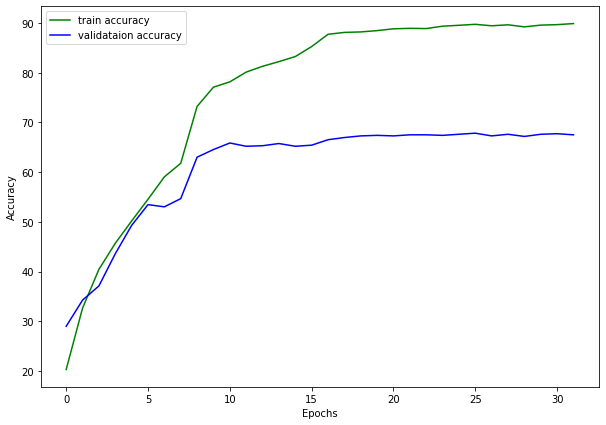

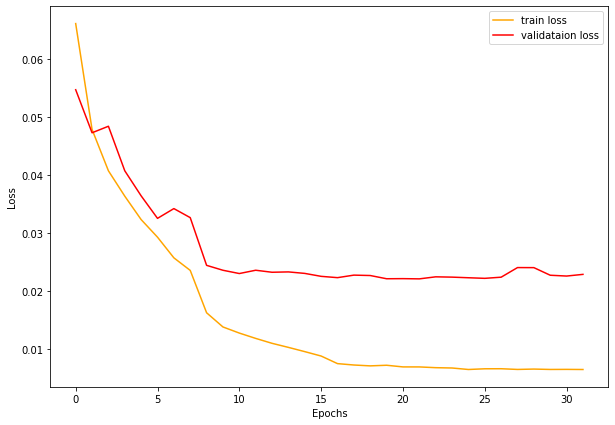

In [16]:
print('customized noise test')
print(f"Training on {len(train_data)} examples, validating on {len(val_data)} examples...")
model = resnet18(pretrained=False, isNoise=True)
model.load_state_dict(initial_state)
model.to(device)
train(model, trainloader, valloader, opt='sgd')
correct, total = test(model, testloader)
print('Accuracy of the network on test images: %0.3f %%' % (100 * correct / total))

customized batchnorm test
Training on 6073 examples, validating on 911 examples...
norm layer <class 'torch.nn.modules.batchnorm.BatchNorm2d'>
dilation [False, False, False]
stride 1
baskicblock ReLU()
baskicblock ReLU()
downsample
stride 2
baskicblock ReLU()
baskicblock ReLU()
downsample
stride 2
baskicblock ReLU()
baskicblock ReLU()
downsample
stride 2
baskicblock ReLU()
baskicblock ReLU()
SGD (
Parameter Group 0
    dampening: 0
    lr: 0.0001
    momentum: 0.9
    nesterov: False
    weight_decay: 0.0001
)
Epoch 1 of 32
train loss 0.0643 val loss 0.0519 train acc 20.91 val acc 31.72 lr 0.1000
Epoch 2 of 32
train loss 0.0448 val loss 0.0432 train acc 36.01 val acc 41.38 lr 0.1000
Epoch 3 of 32
train loss 0.0390 val loss 0.0400 train acc 42.83 val acc 43.36 lr 0.1000
Epoch 4 of 32
train loss 0.0349 val loss 0.0385 train acc 47.62 val acc 46.98 lr 0.1000
Epoch 5 of 32
train loss 0.0313 val loss 0.0351 train acc 51.97 val acc 50.71 lr 0.1000
Epoch 6 of 32
train loss 0.0283 val loss 0.0

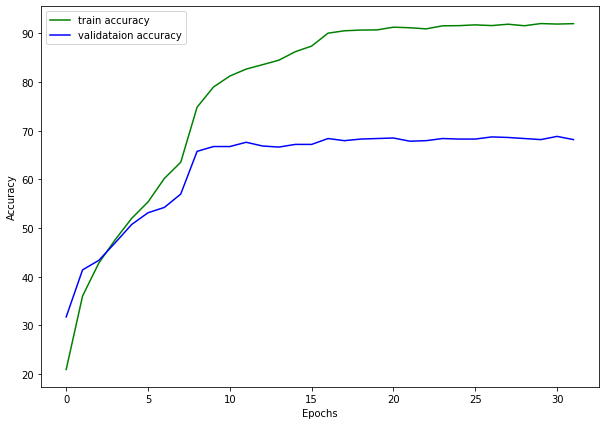

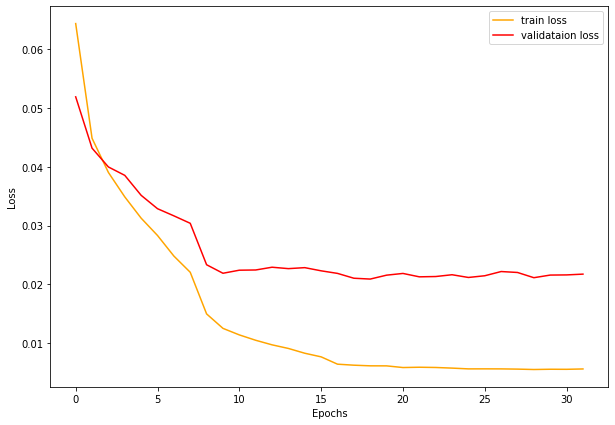

In [17]:
print('customized noise test')
print(f"Training on {len(train_data)} examples, validating on {len(val_data)} examples...")
model = resnet18(pretrained=False, isNoise=True)
model.load_state_dict(initial_state)
model.to(device)
train(model, trainloader, valloader, opt='sgd')
correct, total = test(model, testloader)
print('Accuracy of the network on test images: %0.3f %%' % (100 * correct / total))

Training on 6073 examples, validating on 911 examples...
norm layer <class 'torch.nn.modules.batchnorm.BatchNorm2d'>
dilation [False, False, False]
stride 1
baskicblock ReLU()
baskicblock ReLU()
downsample
stride 2
baskicblock ReLU()
baskicblock ReLU()
downsample
stride 2
baskicblock ReLU()
baskicblock ReLU()
downsample
stride 2
baskicblock ReLU()
baskicblock ReLU()
SGD (
Parameter Group 0
    dampening: 0
    lr: 0.0001
    momentum: 0.9
    nesterov: False
    weight_decay: 0.0001
)
Epoch 1 of 32
train loss 0.0661 val loss 0.0688 train acc 20.53 val acc 27.55 lr 0.1000
Epoch 2 of 32
train loss 0.0465 val loss 0.0475 train acc 34.63 val acc 37.98 lr 0.1000
Epoch 3 of 32
train loss 0.0401 val loss 0.0424 train acc 41.91 val acc 44.35 lr 0.1000
Epoch 4 of 32
train loss 0.0366 val loss 0.0410 train acc 46.27 val acc 42.70 lr 0.1000
Epoch 5 of 32
train loss 0.0338 val loss 0.0382 train acc 49.00 val acc 46.76 lr 0.1000
Epoch 6 of 32
train loss 0.0305 val loss 0.0353 train acc 52.35 val ac

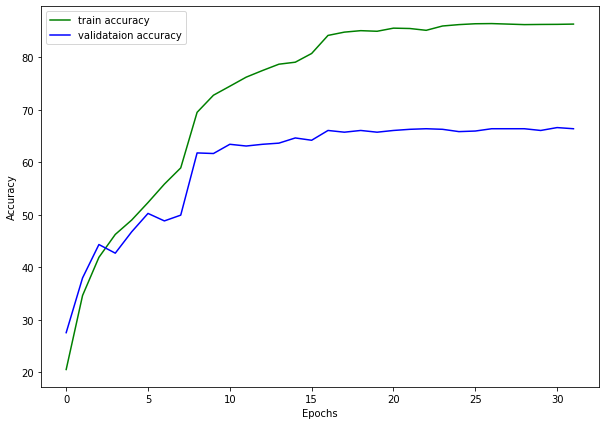

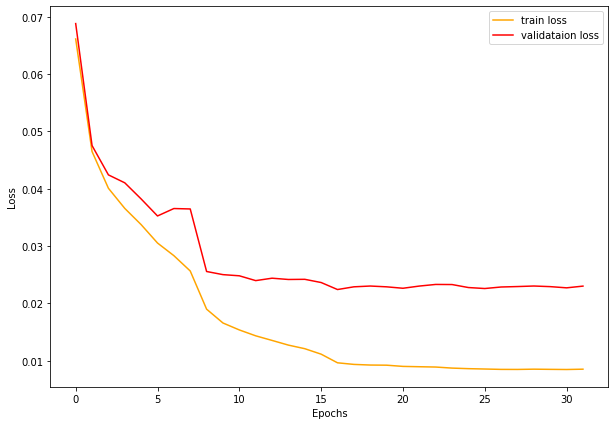

In [18]:
print(f"Training on {len(train_data)} examples, validating on {len(val_data)} examples...")
model = resnet18(pretrained=False)
model.load_state_dict(initial_state)
model.to(device)
train(model, trainloader, valloader, opt='sgd')
correct, total = test(model, testloader)
print('Accuracy of the network on test images: %0.3f %%' % (100 * correct / total))

Training on 6073 examples, validating on 911 examples...
norm layer <class 'torch.nn.modules.batchnorm.BatchNorm2d'>
dilation [False, False, False]
stride 1
baskicblock ReLU()
baskicblock ReLU()
downsample
stride 2
baskicblock ReLU()
baskicblock ReLU()
downsample
stride 2
baskicblock ReLU()
baskicblock ReLU()
downsample
stride 2
baskicblock ReLU()
baskicblock ReLU()
SGD (
Parameter Group 0
    dampening: 0
    lr: 0.0001
    momentum: 0.9
    nesterov: False
    weight_decay: 0.0001
)
Epoch 1 of 32
train loss 0.0737 val loss 0.0603 train acc 16.94 val acc 27.11 lr 0.1000
Epoch 2 of 32
train loss 0.0519 val loss 0.0508 train acc 28.90 val acc 32.49 lr 0.1000
Epoch 3 of 32
train loss 0.0451 val loss 0.0494 train acc 36.26 val acc 35.13 lr 0.1000
Epoch 4 of 32
train loss 0.0406 val loss 0.0445 train acc 41.69 val acc 40.72 lr 0.1000
Epoch 5 of 32
train loss 0.0370 val loss 0.0407 train acc 45.56 val acc 43.47 lr 0.1000
Epoch 6 of 32
train loss 0.0333 val loss 0.0383 train acc 49.46 val ac

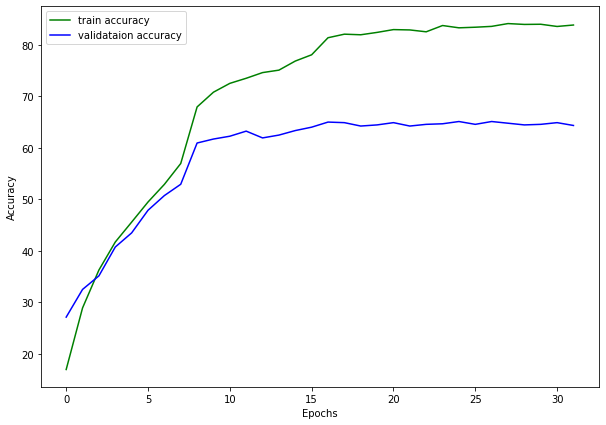

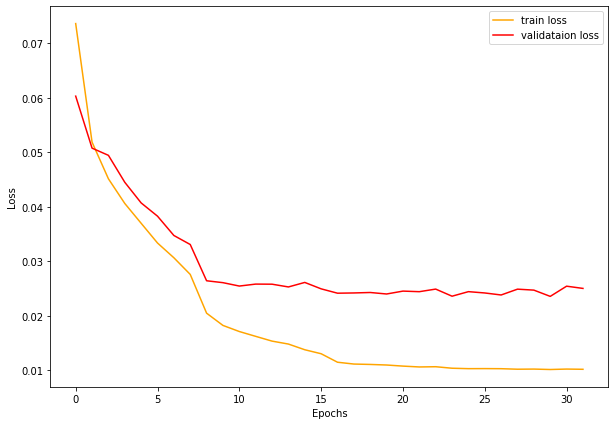

In [19]:
print(f"Training on {len(train_data)} examples, validating on {len(val_data)} examples...")
model = resnet18(pretrained=False)
model.load_state_dict(initial_state)
model.to(device)
train(model, trainloader, valloader, opt='sgd')
correct, total = test(model, testloader)
print('Accuracy of the network on test images: %0.3f %%' % (100 * correct / total))